<a href="https://colab.research.google.com/github/noayarae/Python-Libraries/blob/master/XGBoost_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresión con XGBoost

Este ejemplo predice la temperatura del agua de ríos empleando variables de predicción de Temperatura del aire, descarga, et.

## Lectura de base de datos (BBDD)

In [2]:
from pandas import read_csv

In [3]:
# Read DATA. 
# E: header=0, does not consider header. index_col=0 does not consider first col
data = read_csv('005_sb31_8v_no_norm_SF0_SFmax.csv', header=0, index_col=0) 

In [4]:
data.head()

,scenario,Ta,Wind,SR,HR,DY,Flow,pp,SF,Tw
Date,,,,,,,,,,
2/16/2012,no_riparian,2.25,0.671,2.528,0.963,0.393590,3.002,1.453580,0.0,5.96
2/17/2012,no_riparian,2.75,0.729,2.625,0.931,0.401488,3.143,4.239576,0.0,6.95
2/18/2012,no_riparian,4.80,1.471,8.031,0.868,0.409356,4.474,12.574565,0.0,6.96
2/19/2012,no_riparian,1.80,0.706,6.046,0.880,0.417194,5.097,7.771288,0.0,6.58
2/20/2012,no_riparian,2.00,1.135,2.974,0.963,0.425000,5.324,3.934996,0.0,6.68


### Select predictors and response variable

In [5]:
# Select output and input variables
X = data.drop(['scenario', 'Tw'],axis=1)
y = data['Tw']
print ("Data dimension (X), (y):", X.shape, y.shape)

Data dimension (X), (y): (6438, 8) (6438,)


### Split train and test

In [6]:
# Split into train and test (Method 1) (Random split)
from sklearn.model_selection import train_test_split
# Test-size: 30%, Train-size: 70%
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
print("Datasets dimension - Method-1 \n train_x, train_y, test_x, test_y: \n", 
      train_x.shape, test_x.shape, train_y.shape, test_y.shape)


Datasets dimension - Method-1 
 train_x, train_y, test_x, test_y: 
 (4506, 8) (1932, 8) (4506,) (1932,)


### Selecting the model

In [7]:
from xgboost import XGBRegressor
model = XGBRegressor()

### Fitting the model and score


In [8]:
model.fit(train_x, train_y)

[08:04:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### Score (Accuracy)

In [9]:
# Default score for regression: rmse. Default score for classification: error
model_score = model.score(train_x, train_y)
print (model_score)

0.9764515832882044


### Importance of variables
Importance of variables in proportion

Next, Importance of variables in Weights. These are not same as importance. [Read more](https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost). 

Next, Importance of variables in Gains

Next, Importance of variables in scores same as weights

In [10]:
# Importance of variables in proportion
print ("Importance of variables in proportion")
print (X.columns)
print (100*model.feature_importances_,"\n")

# Importance of variables in Weights
print ("Importance of variables in Weights")
f_import_weights = model.get_booster().get_score(importance_type='weight')
keys = list(f_import_weights.keys())
values = list(f_import_weights.values())
print (keys,'\n',values,'\n')

# Importance of variables in Gains
print ("Importance of variables in Gains")
f_import_gain = model.get_booster().get_score(importance_type='gain')
keys = list(f_import_gain.keys())
values = list(f_import_gain.values())
print (keys)
print (values,"\n")

# Importance of variables in scores same as weights
print ("Importance of variables in Scores")
print (model.get_booster().get_score())


Importance of variables in proportion
Index(['Ta', 'Wind', 'SR', 'HR', 'DY', 'Flow', 'pp', 'SF'], dtype='object')
[68.99149     1.12878     1.9678047   0.23551187 13.584593    5.875238
  2.1005669   6.116013  ] 

Importance of variables in Weights
['Ta', 'SF', 'Flow', 'pp', 'DY', 'Wind', 'SR', 'HR'] 
 [163, 91, 131, 76, 79, 36, 71, 36] 

Importance of variables in Gains
['Ta', 'SF', 'Flow', 'pp', 'DY', 'Wind', 'SR', 'HR']
[1940.902047508178, 172.05861805663744, 165.2850296478397, 59.094162368800006, 382.1683430677278, 31.755383769055566, 55.35923033663238, 6.625534067222223] 

Importance of variables in Scores
{'Ta': 163, 'SF': 91, 'Flow': 131, 'pp': 76, 'DY': 79, 'Wind': 36, 'SR': 71, 'HR': 36}


### Plot importance of variables

[68.99149    13.584593    6.116013    5.875238    2.1005669   1.9678047
  1.12878     0.23551187]


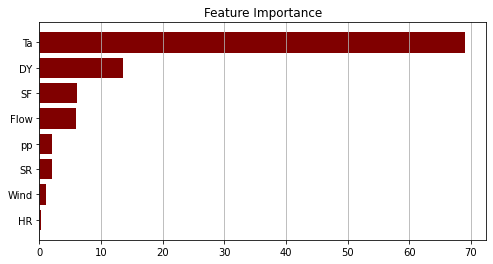

In [12]:
import numpy as np
import matplotlib.pyplot as plt
f_importance = 100*model.feature_importances_
sorted_idx = np.argsort(f_importance)
fig = plt.figure(figsize=(8, 4))
plt.barh(range(len(sorted_idx)), f_importance[sorted_idx], align='center',color ='maroon')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.grid(axis="x")

print (f_importance[sorted_idx][::-1]) # Reversing the array to show values
plt.show()

## Predicting new values for 'x-test'

In [13]:
predict_test = model.predict(test_x)
print (predict_test[0:10])

[14.201131   5.345115  16.436981   8.451546   4.9998026 10.468667
 10.167007  16.189571  13.984148   1.6325759]


## Model Error
### Train error

In [14]:
# Prediction for 'train_x' values to compare with 'train_y'
pred_train = model.predict(train_x) # prediction for 'Train' values
from sklearn.metrics import mean_squared_error, r2_score  ## use function score   RMSE
print("R2: ",r2_score(train_y, pred_train) ) # how much variance the model explains?
print("MSE:",mean_squared_error(train_y, pred_train) )  ##  lower -> better ?? 

R2:  0.9764515832882044
MSE: 0.40442561328184484


### Test error

In [15]:
model.score(test_x, test_y)  ## R^2
print("R2: ",r2_score(test_y, predict_test)) # 'predict_test' was obtained above
print("MSE:",mean_squared_error(test_y, predict_test))

R2:  0.9696904096143123
MSE: 0.5149188658920845
